In [4]:
import pyspark
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn
import pandas as pd

%matplotlib inline

plt.style.use('default') 

sbn.set(style="whitegrid") 


In [5]:
trocafoneData = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/events.csv',low_memory = False)

In [6]:
trocafoneData.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
trocafoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [8]:
#Creo columnas para poder utilizar la fecha y el horario mas comodamente
trocafoneData['date'] = pd.to_datetime(trocafoneData['timestamp']).dt.date
trocafoneData['time'] = pd.to_datetime(trocafoneData['timestamp']).dt.time
trocafoneData.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31,23:38:05
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39,2018-05-31,23:38:05
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31,23:38:09
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31,23:38:40
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29,13:29:25


In [9]:
#Veo si hay filas duplicadas con los mismos valores en todas las columnas
trocafoneData.duplicated().any()

False

In [10]:
#Nuls en timestamp
trocafoneData['timestamp'].isnull().any()

False

**1) Evento predominante en el date set**

In [11]:
#Chequeo de elementos nulos en la columna de los eventos
trocafoneData['event'].isnull().any()

False

In [12]:
(trocafoneData['event'].value_counts()*100)/trocafoneData['event'].value_counts().sum()

viewed product       52.302707
brand listing         9.753404
visited site          8.640269
ad campaign hit       8.190248
generic listing       6.678019
searched products     5.544711
search engine hit     5.038822
checkout              3.335845
staticpage            0.355784
conversion            0.115892
lead                  0.044300
Name: event, dtype: float64

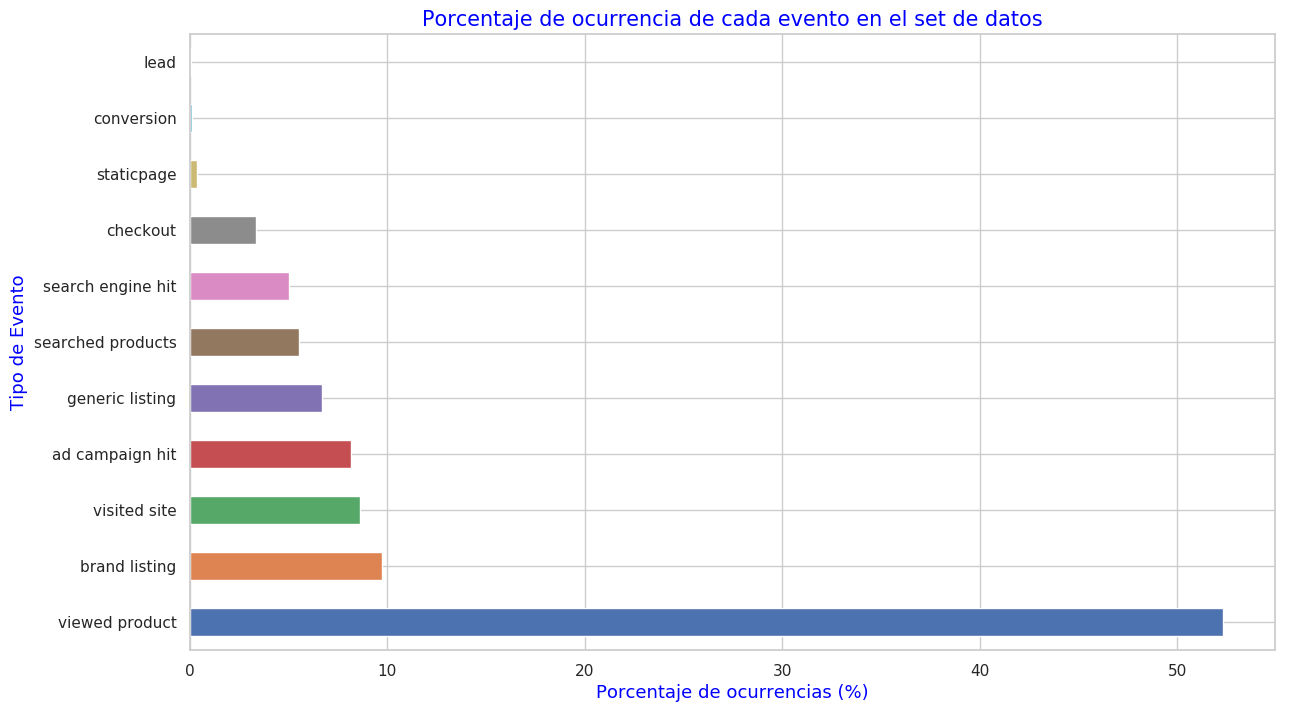

In [13]:
#Grafico
eventos = ((trocafoneData['event'].value_counts()*100)/trocafoneData['event'].value_counts().sum()).plot(figsize=(14,8), kind='barh');
eventos.set_title('Porcentaje de ocurrencia de cada evento en el set de datos',fontsize = 15, color = 'blue');
eventos.set_xlabel('Porcentaje de ocurrencias (%)', color = 'blue', fontsize = 13);
eventos.set_ylabel('Tipo de Evento', color = 'blue', fontsize = 13);

El evento predominante es "Viewed product", mas del 50% del total.

**2) 5 productos con mayor cantidad de conversiones**

In [14]:
#Filtro filas con sku distinto de nulo y que tengan como evento 'conversion'
views = trocafoneData[(trocafoneData['event'] == 'viewed product') & (trocafoneData['sku']!= 'NaN')]
views.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31,23:38:09
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-29,13:29:25
13,2018-04-09 20:13:14,viewed product,000a54b2,NaN,12661.0,Motorola Moto Z Play,Muito Bom,32GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-09,20:13:14
22,2018-05-24 11:27:47,viewed product,000a54b2,NaN,10254.0,iPhone 7 Plus,Excelente,256GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-24,11:27:47
26,2018-05-24 11:28:59,viewed product,000a54b2,NaN,6581.0,iPhone 6S,Bom,16GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-24,11:28:59


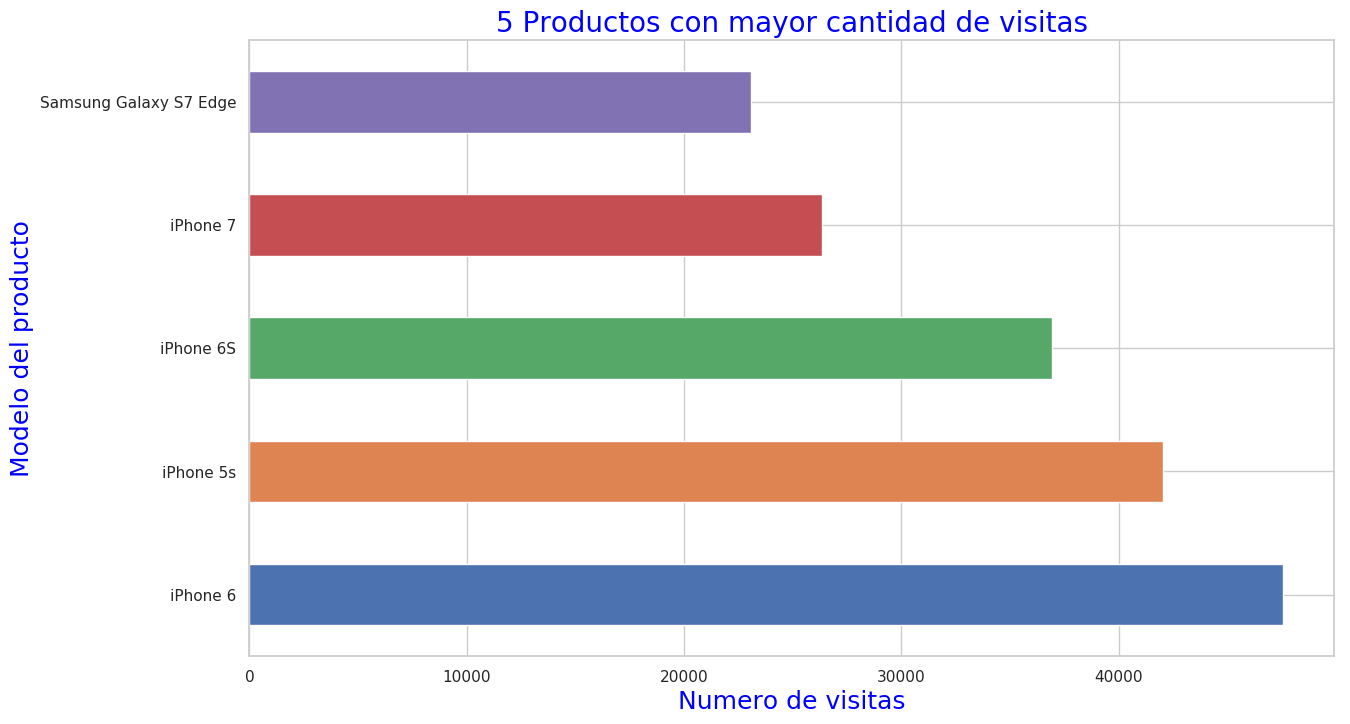

In [15]:
conv_plot = views['model'].value_counts().head(5).plot(figsize=(14,8), kind='barh')
conv_plot.set_title('5 Productos con mayor cantidad de visitas', fontsize = 20, color = 'blue');
conv_plot.set_xlabel('Numero de visitas', color = 'blue', fontsize = 18);
conv_plot.set_ylabel('Modelo del producto', color = 'blue', fontsize = 18);

In [16]:
#Filtro filas con sku distinto de nulo y que tengan como evento 'conversion'
conversions = trocafoneData[(trocafoneData['event'] == 'conversion') & (trocafoneData['sku']!= 'NaN')]
conversions.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-20,17:46:12
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,22:28:53
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-10,14:37:50
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-16,13:50:25
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357.0,Samsung Galaxy J5,Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-09,22:07:07


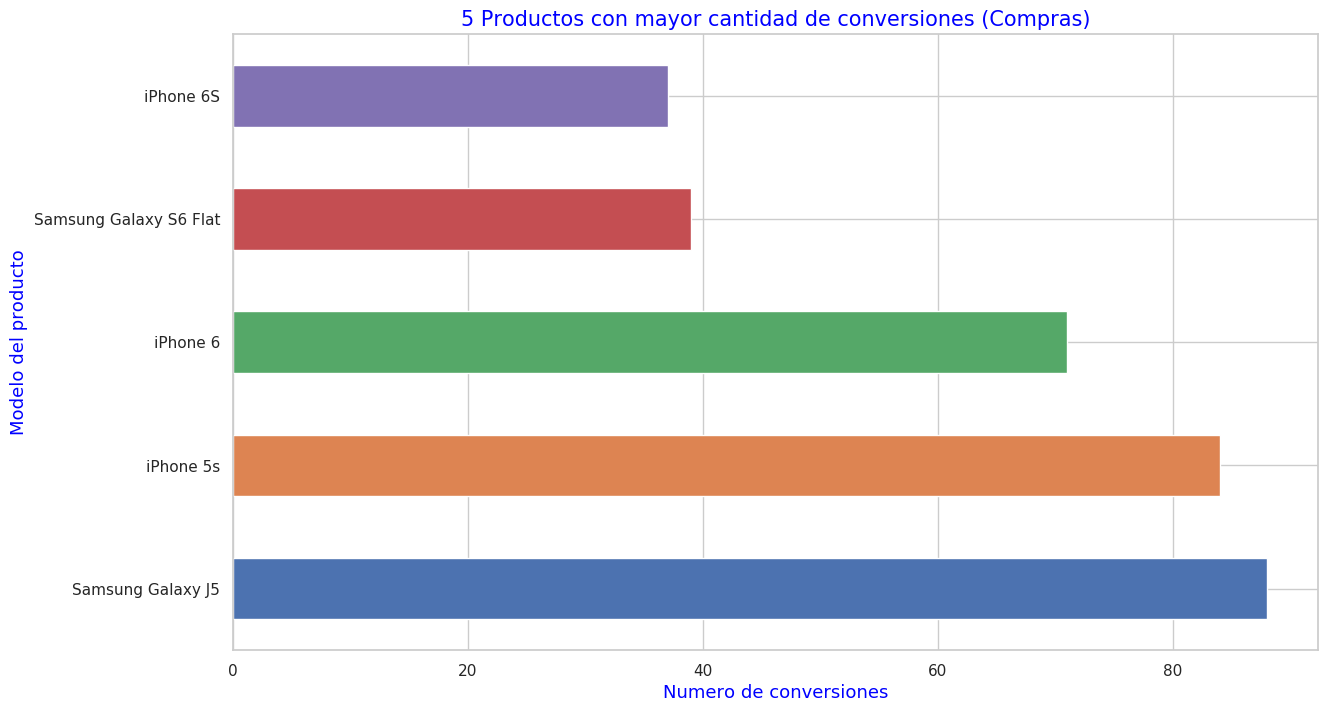

In [17]:
conv_plot = conversions['model'].value_counts().head(5).plot(figsize=(14,8), kind='barh')
conv_plot.set_title('5 Productos con mayor cantidad de conversiones (Compras)', fontsize = 15, color = 'blue');
conv_plot.set_xlabel('Numero de conversiones', color = 'blue', fontsize = 13);
conv_plot.set_ylabel('Modelo del producto', color = 'blue', fontsize = 13);

**3) Los 10 usuarios con mayor actividad en el sitio**

In [18]:
#Chequeo de elementos nulos en la columna de los usuarios
trocafoneData['person'].isnull().any()

False

In [19]:
trocafoneData['person'].value_counts().head(10)

71492f2b    2771
6b07be7b    2770
285101a1    2140
3e34b3cf    1877
2d5a84c1    1800
5f25cb5d    1797
5af7e2bc    1773
3b5a5833    1705
d7e60792    1352
cd6e0b8d    1254
Name: person, dtype: int64

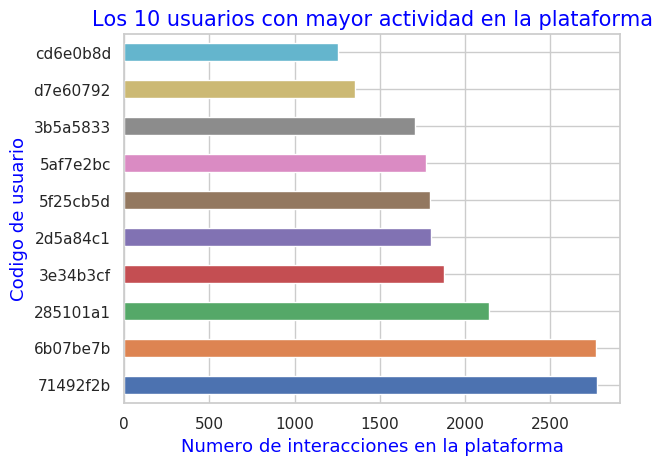

In [20]:
#Los 10 usuarios con mayor actividad en la plataforma
users = (trocafoneData['person'].value_counts().head(10)).plot(kind='barh');
users.set_title('Los 10 usuarios con mayor actividad en la plataforma',fontsize = 15, color = 'blue');
users.set_xlabel('Numero de interacciones en la plataforma', color = 'blue', fontsize = 13);
users.set_ylabel('Codigo de usuario', color = 'blue', fontsize = 13);

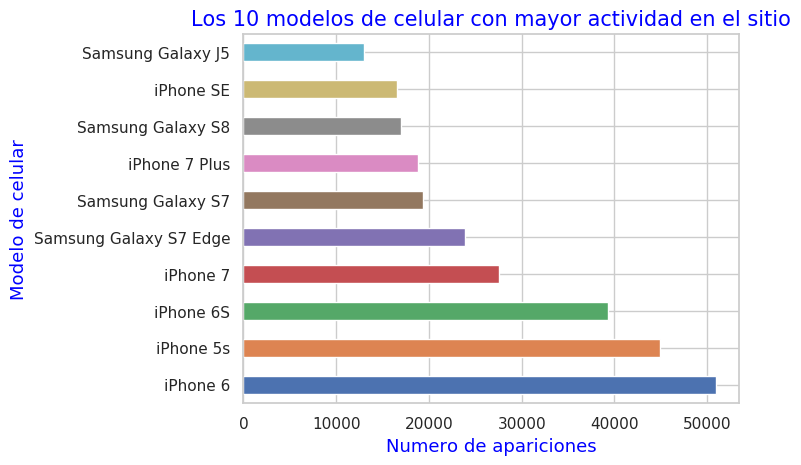

In [21]:
#Modelos de cel que mas aparecen
modelsData = trocafoneData[trocafoneData['model'] != 'Nan']
#modelsData['model'].value_counts()
modelsPlot = modelsData['model'].value_counts().head(10).plot(kind = 'barh');
modelsPlot.set_title('Los 10 modelos de celular con mayor actividad en el sitio', fontsize = 15, color = 'blue')
modelsPlot.set_xlabel('Numero de apariciones', color = 'blue', fontsize = 13)
modelsPlot.set_ylabel('Modelo de celular', color = 'blue', fontsize = 13);

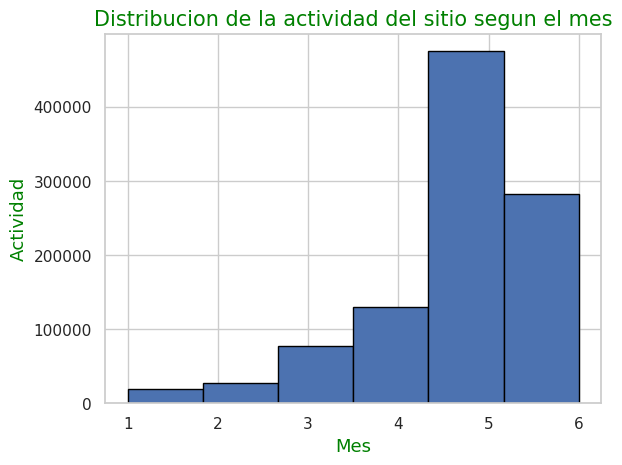

In [22]:
#Distribucion de la actidad del sitio segun el mes
monthPlot = pd.to_datetime(trocafoneData['date']).dt.month.hist(bins = 6, edgecolor = 'black');
monthPlot.set_title('Distribucion de la actividad del sitio segun el mes', fontsize = 15, color = 'green')
monthPlot.set_xlabel('Mes', color = 'green', fontsize = 13)
monthPlot.set_ylabel('Actividad', color = 'green', fontsize = 13);

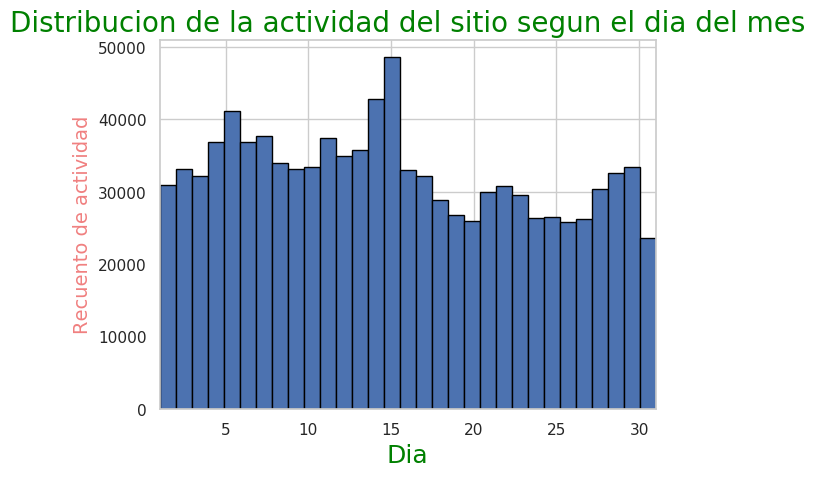

In [58]:
#Distribucion de la actidad del sitio segun el dia de la semana
fig = plt.figure()
daysPlot = fig.add_subplot(111)
plt.title('Distribucion de la actividad del sitio segun el dia del mes', fontsize = 20, color = 'green')

daysPlot.set_xlabel('Dia', color = 'green', fontsize = 14)

pd.to_datetime(trocafoneData['date']).dt.day.hist(bins = 31, edgecolor = 'black')

#pd.to_datetime(trocafoneData['date']).dt.day.plot.kde(ax = daysPlot, secondary_y=True, color = 'Blue')
daysPlot.set_ylabel('Recuento de actividad', color = 'gree', fontsize = 14)
#daysPlot.set_ylabel('Frecuencia', color = 'lightcoral', fontsize = 14);
daysPlot.set_xlim(1, 31 )
plt.show()

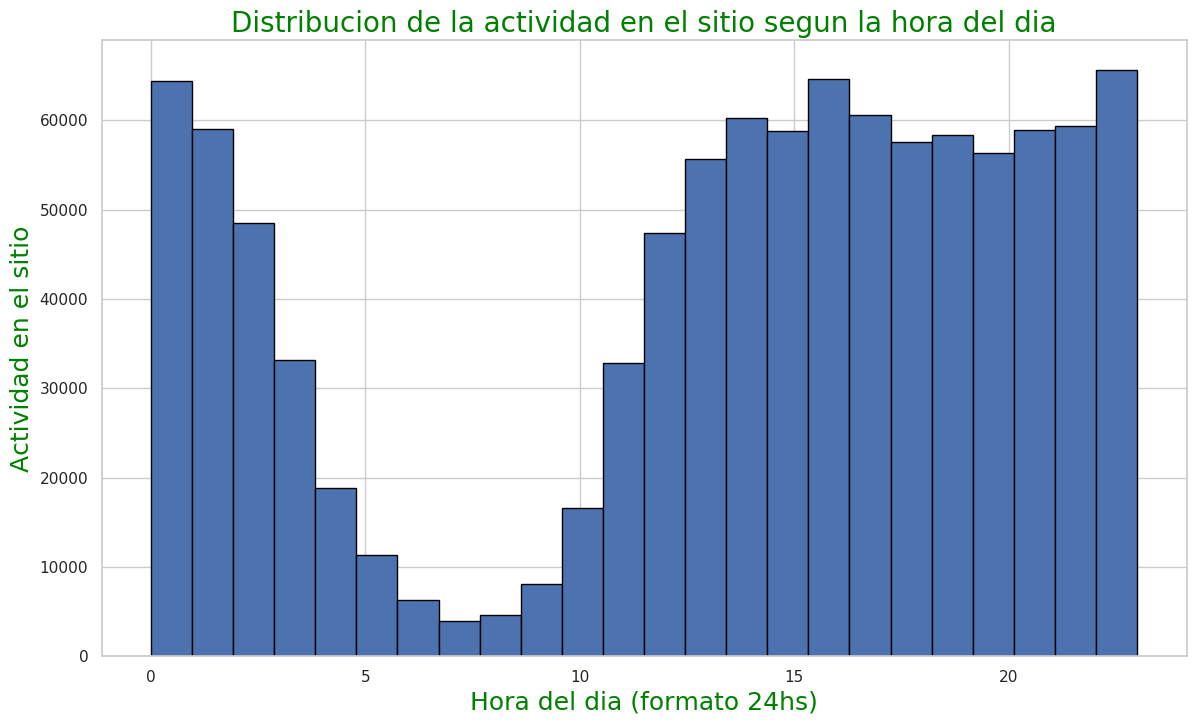

In [24]:
#Distribucion de la actidad del sitio segun la hora del dia
hoursPlot = pd.to_datetime(trocafoneData['timestamp']).dt.hour.hist(figsize=(14,8), bins = 24, edgecolor = 'black')
hoursPlot.set_title('Distribucion de la actividad en el sitio segun la hora del dia',fontsize = 20, color = 'green')
hoursPlot.set_xlabel('Hora del dia (formato 24hs)', fontsize = 18 , color = 'green')
hoursPlot.set_ylabel('Actividad en el sitio', fontsize = 18 , color = 'green');

In [25]:
trocafoneData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 25 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

In [26]:
trocafoneData['event'].drop_duplicates()

0         ad campaign hit
1            visited site
2          viewed product
3                checkout
8         generic listing
10      search engine hit
12          brand listing
157     searched products
220            conversion
254            staticpage
3248                 lead
Name: event, dtype: object

In [27]:
df=trocafoneData

In [28]:
df[df['event'] == 'checkout'].head(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-05-31,23:38:40


In [29]:
df[df['event'] == 'conversion'].head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version,date,time
220,2018-03-20 17:46:12,conversion,00204059,NaN,3084.0,Motorola Moto X2,Muito Bom,32GB,Couro Vintage,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-20,17:46:12
2282,2018-04-26 22:28:53,conversion,00c13dee,NaN,6650.0,Samsung Galaxy Core Plus Duos TV,Muito Bom,4GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-04-26,22:28:53
2547,2018-06-10 14:37:50,conversion,00fdbb4b,NaN,3348.0,Samsung Galaxy S6 Flat,Muito Bom,32GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-06-10,14:37:50
4245,2018-03-16 13:50:25,conversion,0146a9df,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-03-16,13:50:25
6985,2018-02-09 22:07:07,conversion,01db2fe6,NaN,6357.0,Samsung Galaxy J5,Bom,16GB,Preto,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-09,22:07:07


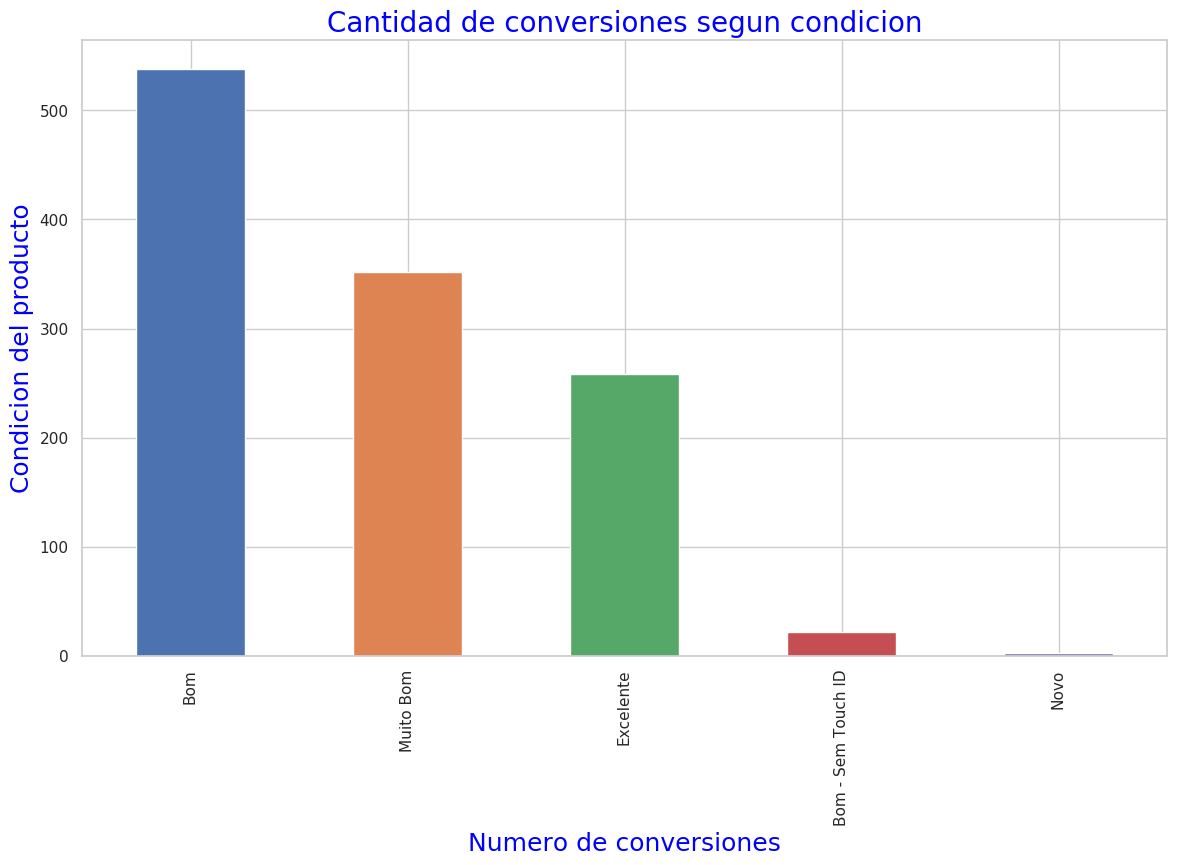

In [30]:
conv_plot = conversions['condition'].value_counts().plot(figsize=(14,8), kind='bar')
conv_plot.set_title('Cantidad de conversiones segun condicion', fontsize = 20, color = 'blue');
conv_plot.set_xlabel('Numero de conversiones', color = 'blue', fontsize = 18);
conv_plot.set_ylabel('Condicion del producto', color = 'blue', fontsize = 18);